# Import libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pacmap
import scipy.stats as stats

plt.style.use('default')

# Plotting Function

Declare a function for retrieving the n most variable genes

In [2]:
def get_genes(n=5000):
    data = "../Data/Variance/most_variable_" + str(n) + ".csv"
    return pd.read_csv(data, index_col="Unnamed: 0").T

Declare a dictionary mapping string keys of cluster algorithms to their functions. Calling is as follows:  
`cluster_by['KMeans' | 'KMedoids'](params)`

In [3]:
cluster_by = {
    'KMeans': KMeans,
    'KMedoids': KMedoids,
}

The following function accepts a string argument for a clustering algorithm, a number of genes to cluster, a number of clusters, and additional keyword arguments to the desired clustering algorithm

In [4]:
def plot_clusters(clust_algo, dimensions = 10, clusters = 4, **kwargs):
    
    # Open dataset of dimensions genes and convert to transposed matrix
    var_genes = get_genes(dimensions)

    clust_obj = cluster_by[clust_algo](n_clusters=clusters, **kwargs).fit(var_genes)

    # Visualization 2-D
    embedding_2 = pacmap.PaCMAP(n_neighbors=40, random_state=42) 
    pacmap_2_axes = embedding_2.fit_transform(var_genes.values)
    plt.scatter(pacmap_2_axes[:,0], pacmap_2_axes[:,1], c=clust_obj.labels_)
    plt.title("Top " + str(dimensions) + " genes within " + str(clusters) + " clusters by " + clust_algo + ", 2-D")
    plt.savefig("../Figures/Assg_3/Clustering/" + clust_algo + "_top_" + str(dimensions) + "_clusternum_" + str(clusters) + "_2_dim", bbox_inches="tight")
    plt.show()
    
    # Visualization 3-D
    
    embedding_3 = pacmap.PaCMAP(n_components=3, n_neighbors=40) 
    pacmap_3_axes = embedding_3.fit_transform(var_genes.values, init="pca")
    ax = plt.axes(projection ="3d")
    ax.scatter3D(pacmap_3_axes[:,0], pacmap_3_axes[:,1], pacmap_3_axes[:,2], c = clust_obj.labels_)
    plt.title("Top " + str(dimensions) + " genes within " + str(clusters) + " clusters by " + clust_algo + ", 3-D")
    plt.savefig("../Figures/Assg_3/Clustering/" + clust_algo + "_top_" + str(dimensions) + "_clusternum_" + str(clusters) + "_3_dim", bbox_inches="tight")
    plt.show()

## Examining correlation between gene expressions
The following heatmap was generated based on the correlations of the 10 most variable genes.

<AxesSubplot: >

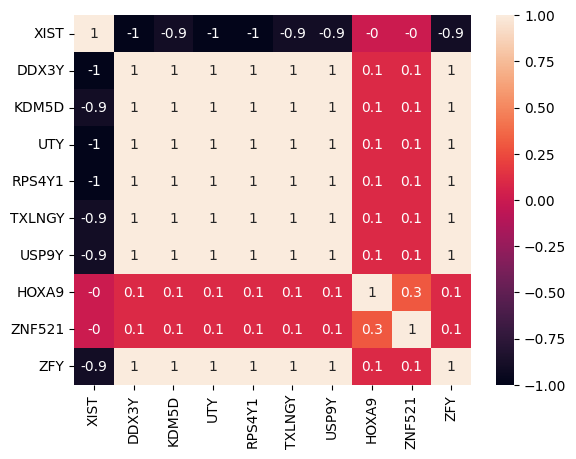

In [22]:
var_genes = get_genes(10)
var_genes = var_genes.corr()
sns.heatmap(var_genes.round(1), annot=True)

Due to the high number of correlated genes in just the top 10 most variable genes, we can expect that our clustering analysis will fail to uncover features of AML attributable to primary cytogenetic mutations. 

## Picking k-value using the Elbow Method

In [5]:
var_genes = get_genes()

To use this function, first specify the clustering algorithm by passing either 'KMeans' or by 'KMedoids', then a list of keyword arguments for that specific clustering algorithm. Internally, the clustering algorithm is accessed by the dictionary `cluster_by` which maps the algorithm string to the corresponding algorithm.

In [6]:
def optimal_k(clust_algo, **kwargs):
    sos = []
    k = range(2,10)
    for n in k:
        cluster_obj = cluster_by[clust_algo](n_clusters=n, **kwargs).fit(var_genes)
        sos.append(cluster_obj.inertia_)
    plt.plot(k,sos,'bx-')
    plt.xlabel('k values') 
    plt.ylabel('Sum of squared distances/inertia') 
    plt.title('Elbow method for optimal k')
    plt.show()

Pick an optimal k-value for K-Means clustering using 5000 genes

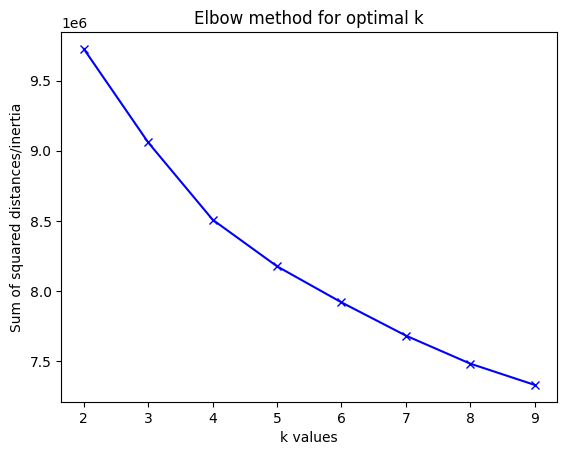

In [7]:
optimal_k('KMeans', random_state=0)

Pick an optimal k-value for KMedoids clustering from 5000 genes

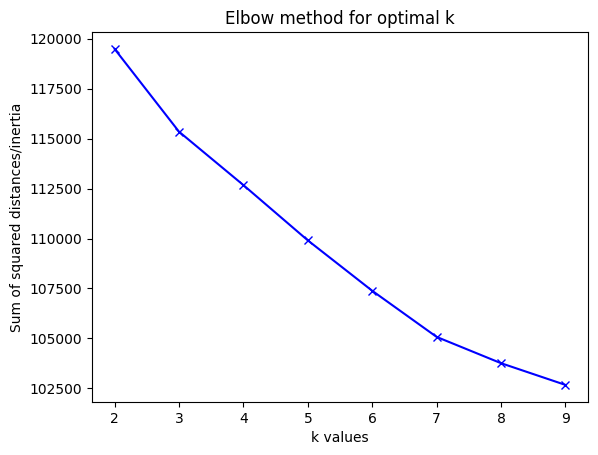

In [8]:
optimal_k('KMedoids', method='pam', init='random', random_state=1234)

The elbow graphs indicate that our gene dataset has many "noisy" genes, but there is an optimal k-value of 3 for both algorithms.

## Clustering with KMeans from [SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


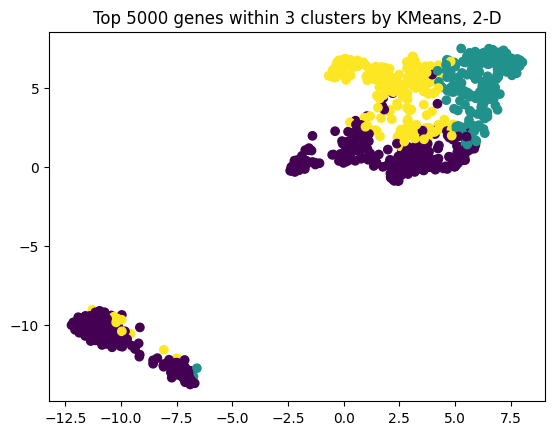

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


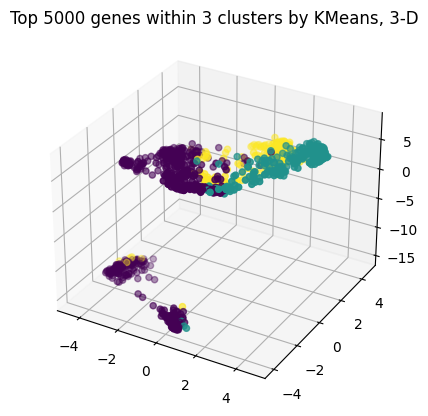

In [9]:
plot_clusters('KMeans', dimensions=5000, clusters=3, random_state=0)

## PAM Clustering with K-Medoids from [scikit KMedoids](https://scikit-learn-extra.readthedocs.io/en/stable/install.html)

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


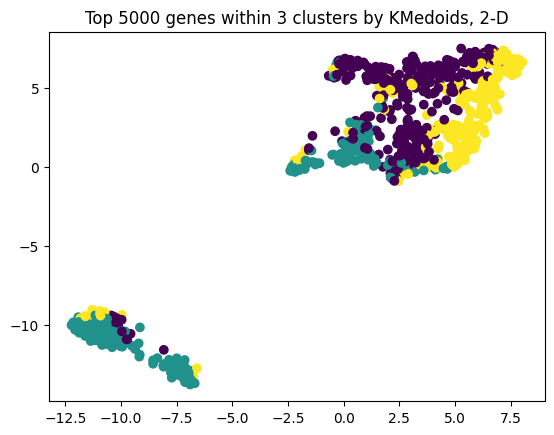

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


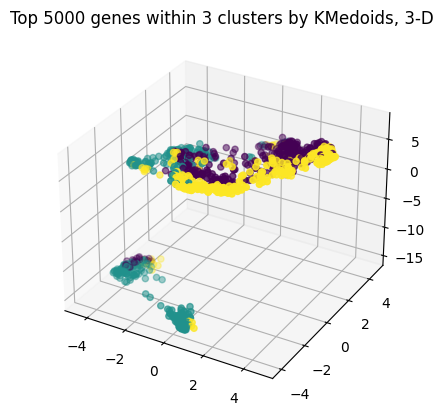

In [10]:
plot_clusters('KMedoids', dimensions = 5000, clusters = 3)

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


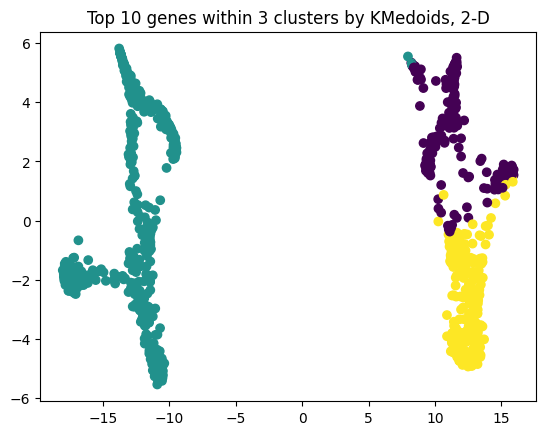

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


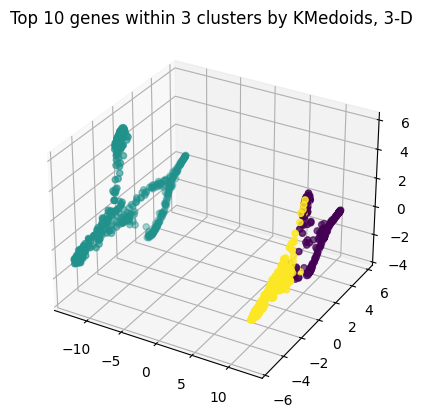

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


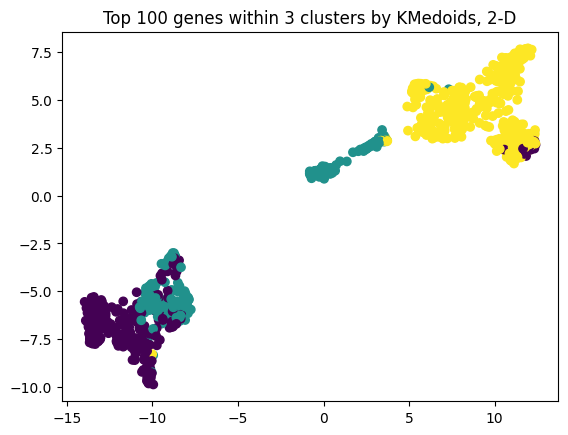

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


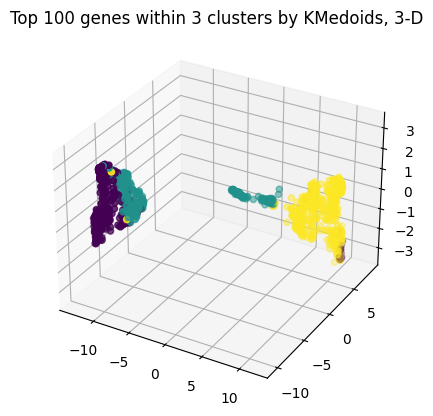

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


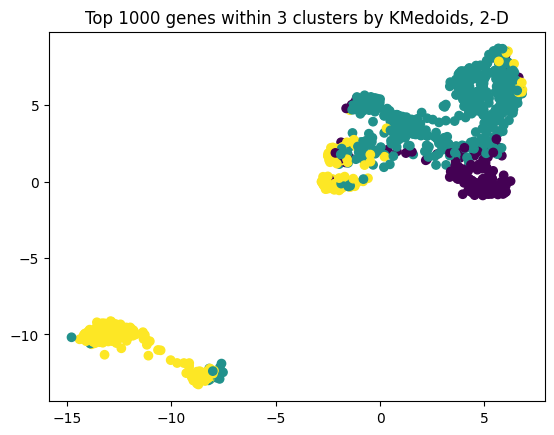

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


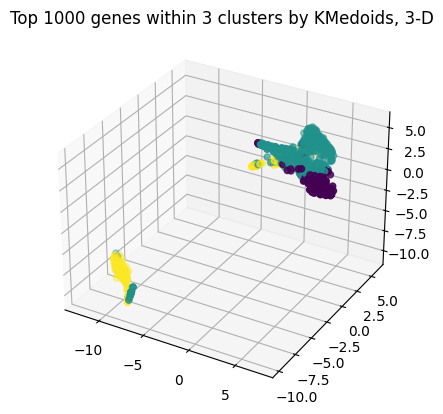

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


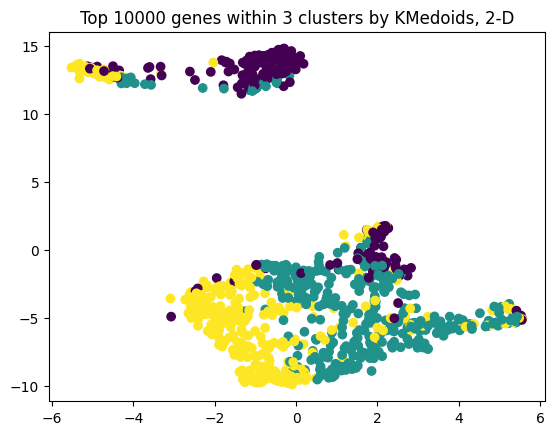

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


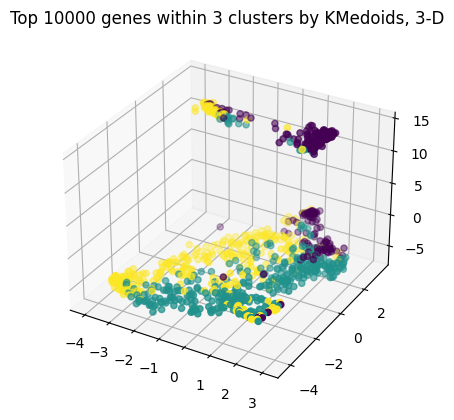

In [11]:
j=10
while(j <= 10000):
    plot_clusters('KMedoids', dimensions = j, clusters = 3, method='pam', init='random', random_state=1234)
    j*=10

# Sample Heatmap

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


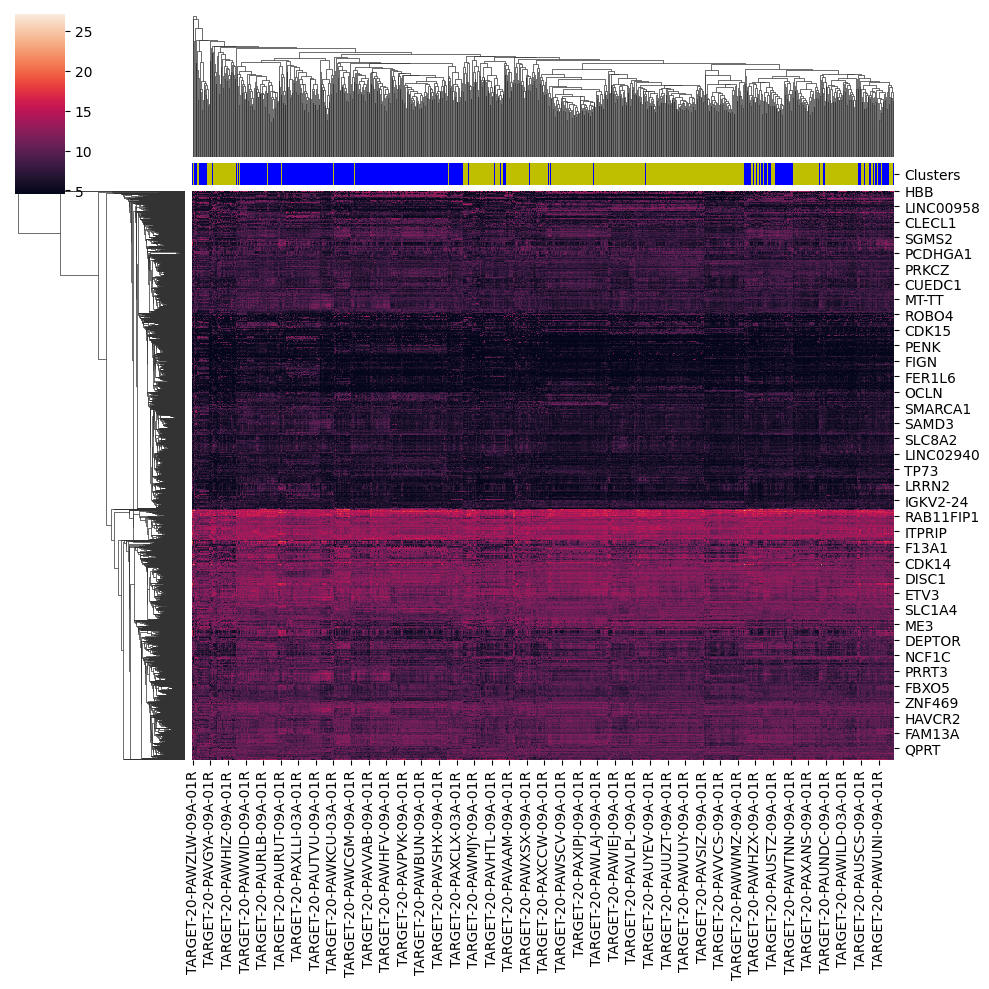

In [12]:
variance_genes = pd.read_csv("../Data/Variance/most_variable_5000.csv", index_col="Unnamed: 0").T
kmeans = KMeans(n_clusters=2, random_state=0).fit(variance_genes)
series = pd.Series(kmeans.labels_)
lut = dict(zip(series.unique(), "by"))
row_colors = series.map(lut)
patients_labels = pd.DataFrame(row_colors.values, variance_genes.index.values).rename(columns={0:"Clusters"})
sns.clustermap(variance_genes.T, col_colors=patients_labels)

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


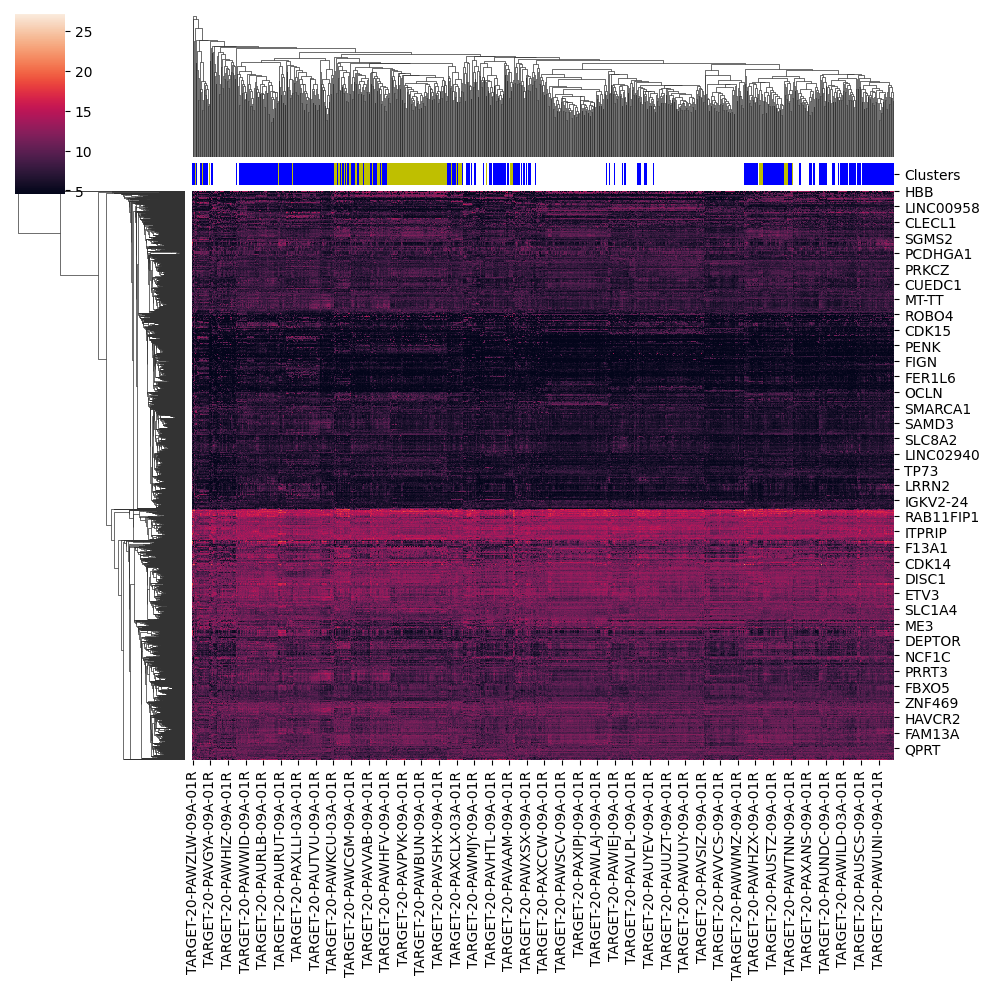

In [13]:
variance_genes = pd.read_csv("../Data/Variance/most_variable_5000.csv", index_col="Unnamed: 0").T
kmedoids = KMedoids(n_clusters=3, method='pam', init='random', random_state=1234).fit(variance_genes)
series = pd.Series(kmedoids.labels_)
lut = dict(zip(series.unique(), "by"))
row_colors = series.map(lut)
patients_labels = pd.DataFrame(row_colors.values, variance_genes.index.values).rename(columns={0:"Clusters"})
sns.clustermap(variance_genes.T, col_colors=patients_labels)

# Sample Sankey

In [14]:
df = pd.read_csv('../Data/sankey.csv') #Read above CSV

#Sort by Source and then Destination
df['source'] = pd.Categorical(df['source'], ['0-10', "11-100", "101-1000", "1001-5000", "5001-10000"])
df['destination'] = pd.Categorical(df['destination'], ["Cluster 1", "Cluster 2"])
df.sort_values(['source', 'destination'], inplace = True)
df.reset_index(drop=True)
df.value.to_list()

FileNotFoundError: [Errno 2] No such file or directory: '../Data/sankey.csv'

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 50,
      line = dict(color = "black", width = 0.5),
      label = ["0-10", "11-100", "101-1000", "1001-5000", "5001-10000", "Cluster 1", "Cluster 2"],
      color = ['#808B96', '#EC7063', '#F7DC6F', '#4710B0', '#AF7AC5', '#48C9B0', '#982910'],
      x = [0.001, 0.001, 0.001, 0.001, 0.001, 0.999, 0.999],
      y = [0.001, 0.07, 0.2, 0.5, 1, 0.2, 0.99]
    ),
    link = dict(
      source = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4],
      target = [5, 6, 5, 6, 5, 6, 5, 6, 5, 6],
      value  = df.value.to_list()
  ))])

fig.update_layout(title_text="Cluster Diagrams, N=10000", font_size=20)
fig.show()

In [ ]:
pd.DataFrame([["0 - 10", "Cluster 1", "8 (80%)"], ["", "Cluster 2", "2 (20%)"], ["0 - 100", "Cluster 1", "40 (40%)"], ["", "Cluster 2", "60 (60%)"], 
              ["0 - 1000", "Cluster 1", "584 (58%)"], ["", "Cluster 2", "416 (42%)"], ["0 - 5000", "Cluster 1", "2038 (41%)"], ["", "Cluster 2", "5591 (56%)"], 
              ["0 - 10000", "Cluster 1", "4409 (44%)"], ["", "Cluster 2", "5591 (56%)"]]).rename(columns={0:"Genes", 1:"Cluster", 2:"Cumulative"}).set_index("Genes")

,Cluster,Cumulative
Genes,,
0 - 10,Cluster 1,8 (80%)
,Cluster 2,2 (20%)
0 - 100,Cluster 1,40 (40%)
,Cluster 2,60 (60%)
0 - 1000,Cluster 1,584 (58%)
,Cluster 2,416 (42%)
0 - 5000,Cluster 1,2038 (41%)
,Cluster 2,5591 (56%)
0 - 10000,Cluster 1,4409 (44%)


# Assessing goodness of fit of clustering results

It is necessary to compare the results of each clustering method to the primary cytogenetic code for each sample to determine how well the clustering algorithms model differences in gene expression among the categories of PCC.

The following function generates a contingency table for the results of each clustering algorithm. Each sample is mapped to both its PCC and its cluster; the assignments are cross-multiplied to generate the combination of each category, then the frequency of each combination is assessed. The contingency table lists the absolute frequency of each combination of a PCC and a cluster group. 

In [15]:
def compute_cont_table(clust_algo, dimensions=10, clusters=7, **kwargs):
    # Function for computing the contingency table comparing AML primary cytogenetic codes to cluster categories

    # Open dataset of normalized genes and convert to transposed matrix
    var_genes = get_genes(dimensions)

    clust_obj = cluster_by[clust_algo](n_clusters=clusters, **kwargs).fit(var_genes)

    # Open the clinical data and slice for PCC
    clinical = pd.read_pickle('../Data/clinical_data.pickle')
    clinical = clinical['Primary Cytogenetic Code'].astype('category')

    # Get cluster assignments for each sample into a series
    clusters = clust_obj.labels_.tolist()
    clusters = pd.Series(clusters, index=var_genes.index, dtype='category', name='cluster')

    # Generate long-format map of samples to PCC and cluster assignment
    sample_map = pd.merge(clinical, clusters, how='outer', right_index=True, left_index=True)
    sample_map.rename(columns={'Primary Cytogenetic Code' : 'PCC'})

    cont_tab = pd.crosstab(clinical, clusters)

    display(cont_tab)
    
    return sample_map, cont_tab;

## Goodness-of-fit of K-Means clustering

The `observed` variable is assigned the contingency table because it enumerates the observed frequencies of each combination for the sample set of 5000 genes. 

In [25]:
sample_map, observed = compute_cont_table('KMeans', dimensions=5000, random_state=0, clusters=4)

cluster,0,1,2,3
Primary Cytogenetic Code,,,,
MLL,28,2,43,163
Normal,144,11,67,35
Other,128,16,113,34
Unknown,2,4,3,1
inv(16),0,95,5,1
t(8;21),1,139,2,1


Using `observed` and scipy stats' [`chi2_contingency` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency) to assess the goodness-of-fit, we retrieve the chi2 test statistic, the p-value of the test, the degrees of freedom, and the expected frequencies based on the marginal sums of the contingency table.

In [24]:
chi2, p, dof, expected_arr = stats.chi2_contingency(observed)
expected = pd.DataFrame(expected_arr, index=observed.index, columns=observed.columns)
print('Test statistic: ' + str(chi2) + '\np-value: ' + str(p) + '\nDegrees of freedom: ' + str(dof))
display(expected)

Test statistic: 789.9871194155539
p-value: 1.173184991647572e-158
Degrees of freedom: 15


cluster,0,1,2,3
Primary Cytogenetic Code,,,,
MLL,90.489403,58.658960,34.331407,52.520231
Normal,98.541426,63.878613,37.386320,57.193642
Other,111.578035,72.329480,42.332370,64.760116
Unknown,3.834297,2.485549,1.454721,2.225434
inv(16),38.726397,25.104046,14.692678,22.476879
t(8;21),54.830443,35.543353,20.802505,31.823699


Choosing an $\alpha=0.05$ such that the observed frequencies of a PCC in each cluster are similar to the expected ones and comparing this alpha level to the p-value, we see that $p=8.40\times10^{-242} < \alpha=0.05$. Therefore, the chi-squared fit test demonstrates that the K-Means clustering algorithm failed to identify significantly different gene expressions among categories of PCC. 

## Goodness-of-fit of K-Medoids clustering

Again generate the contingency table of `observed` frequencies of each PCC in each cluster in the sample set of 5000 genes. 

In [18]:
sample_map, observed = compute_cont_table('KMedoids', dimensions=5000, method='pam', init='random', random_state=1234, clusters=3)

cluster,0,1,2
Primary Cytogenetic Code,,,
MLL,135,90,11
Normal,9,144,104
Other,13,185,93
Unknown,0,4,6
inv(16),0,6,95
t(8;21),1,24,118


Retrieve the chi2 test statistic, the p-value of the test, the degrees of freedom, and the expected frequencies based on the marginal sums of the contingency table.

In [19]:
chi2, p, dof, expected_arr = stats.chi2_contingency(observed)
expected = pd.DataFrame(expected_arr, index=observed.index, columns=observed.columns)
print('Test statistic: ' + str(chi2) + '\np-value: ' + str(p) + '\nDegrees of freedom: ' + str(dof))
display(expected)

Test statistic: 660.4727670538068
p-value: 1.907768401271367e-135
Degrees of freedom: 10


cluster,0,1,2
Primary Cytogenetic Code,,,
MLL,35.922929,102.994220,97.082852
Normal,39.119461,112.158960,105.721580
Other,44.294798,126.997110,119.708092
Unknown,1.522158,4.364162,4.113680
inv(16),15.373796,44.078035,41.548170
t(8;21),21.766859,62.407514,58.825626


Choosing an $\alpha=0.05$ such that the observed frequencies of a PCC in each cluster are similar to the expected ones and comparing this alpha level to the p-value, we see that $p=1.91\times10^{-135} < \alpha=0.05$. Therefore, the chi-squared fit test demonstrates that the K-Medoids clustering algorithm failed to identify significantly different gene expressions among categories of PCC. 